In [1]:
import pandas as pd
#nomloan.csv : files of loan application including granted and paid back status
loans = pd.read_csv('nomloan.csv', names = ["granted", "paidback", "amount", "purpose", "location", "applicant_species", "applicant_color", "applicant_age", "applicant_residence", "applicant_defaulted_loans"])
loans.head()

,granted,paidback,amount,purpose,location,applicant_species,applicant_color,applicant_age,applicant_residence,applicant_defaulted_loans
0,False,NaN,17,Candystore,Nomberg,Nom,Green,6,Nomberg,0
1,True,True,12,FishRestaurant,Walhafen,Nom,Green,7,Walhafen,1
2,False,NaN,14,Candystore,Nomberg,Nom,Green,24,Nomberg,3
3,True,False,54,FishRestaurant,Nomberg,Walross,Grey,22,Nomberg,2
4,True,False,45,FishRestaurant,Nomberg,Walross,Grey,24,Walhafen,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
creditsGranted = loans[loans["granted"] == True]

# Erste Vermutungen

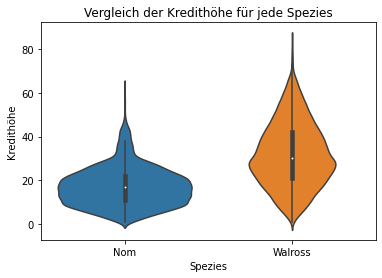

In [4]:
axes = sns.violinplot(data=creditsGranted, x="applicant_species", y="amount")
axes.set_title("Vergleich der Kredithöhe für jede Spezies")
axes.set_xlabel("Spezies")
_ = axes.set_ylabel("Kredithöhe")

Dieser Violinplot zeigt, dass die durchschnittliche Kredithöhe eines Noms deutlich unter der eines Walrosses liegt.

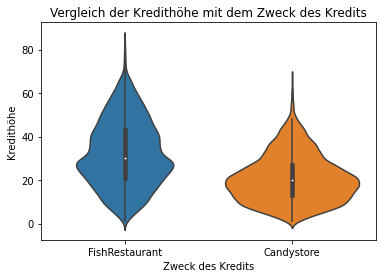

In [5]:
axes = sns.violinplot(data=creditsGranted, x="purpose", y="amount")
axes.set_title("Vergleich der Kredithöhe mit dem Zweck des Kredits")
axes.set_xlabel("Zweck des Kredits")
_= axes.set_ylabel("Kredithöhe")

Dieser Plot hat eine ähnliche Form wie der obige Violinplot. Er zeigt, dass für Candystores grundsätzlich ein niedrigerer Kredit beantragt wird. Eventuell bedeutet dies, dass Noms eher Candystores eröffnen und somit einen geringeren Kredit benötigen.

# Liniendiagramme zur Darstellung von Beziehungen

In [6]:
def create_linechart(hue):
    plt.figure(figsize=(20, 10))
    axes = sns.lineplot(data=loans, x="amount", y="granted", hue=hue)
    axes.set_title(f"Kreditannahmewahrscheinlichkeit abhängig von Kredithöhe und {hue}")
    axes.set_ylabel("Kreditannahmewahrscheinlichkeit")
    axes.set_xlabel("Kredithöhe")
    plt.show()

Die nachfolgenden Plots zeigen die Abhängigkeit der Kreditausgabewahrscheinlichkeit und der Kredithöhe von dem jeweiligen Attribut des Datensatzes.

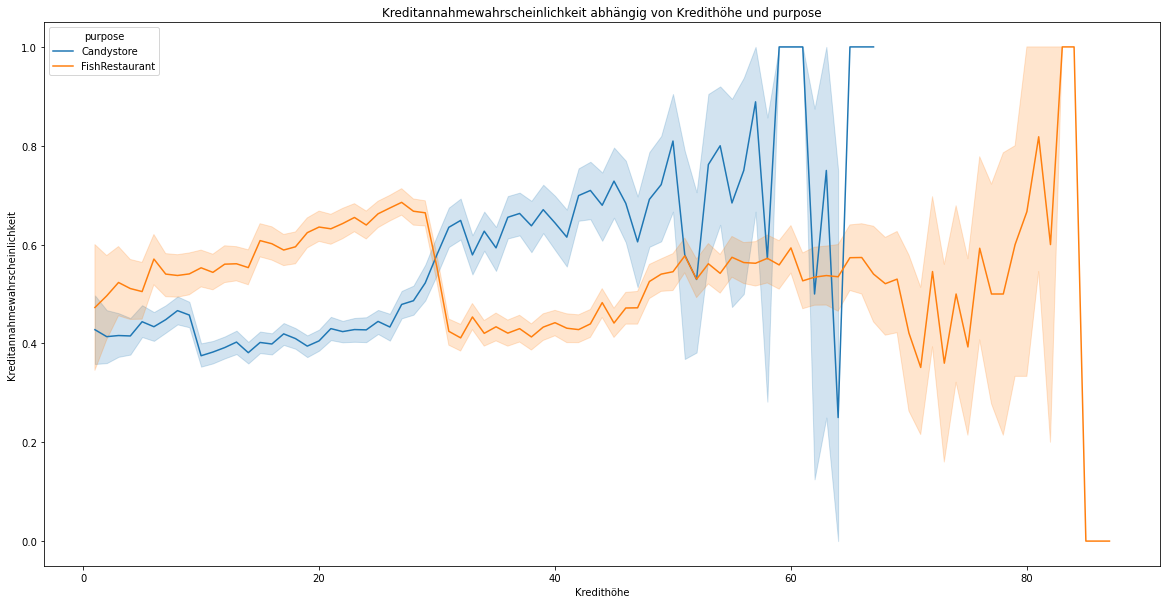

In [18]:
create_linechart("purpose")

Dieser Plot zeigt, dass die in der unteren Kredithöhe (<30) der Kredit für ein Fischrestaurant eher angenommen wird als der eines Candystores. Für Kredit im Bereich 30 bis 65 ist die Wahrscheinlichkeit für einen Candystore größer. Für den letzten Bereich (>65) sind nur noch Kredit für FishRestaurants vorhanden.

Im jeweils höheren Kreditbereich des Zwecks nehmen die Schwankungen immer mehr zu.

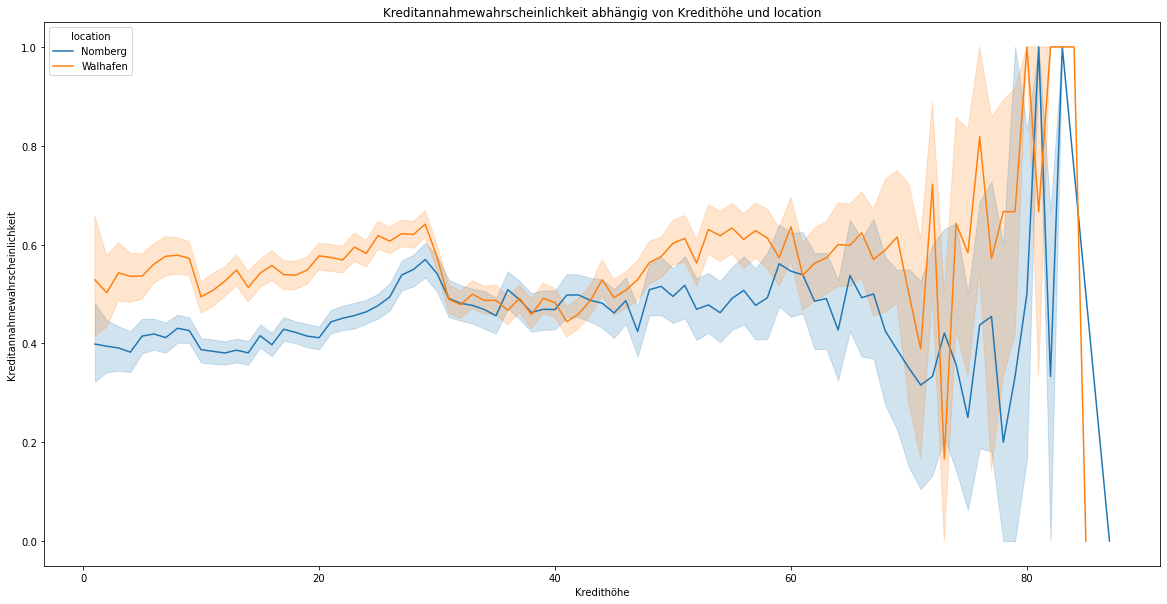

In [8]:
create_linechart("location")

Dieser Plot zeigt, dass der Ort des Restaurants oder Shops die Kreditannahmewahrscheinlichkeit kaum beeinflusst.

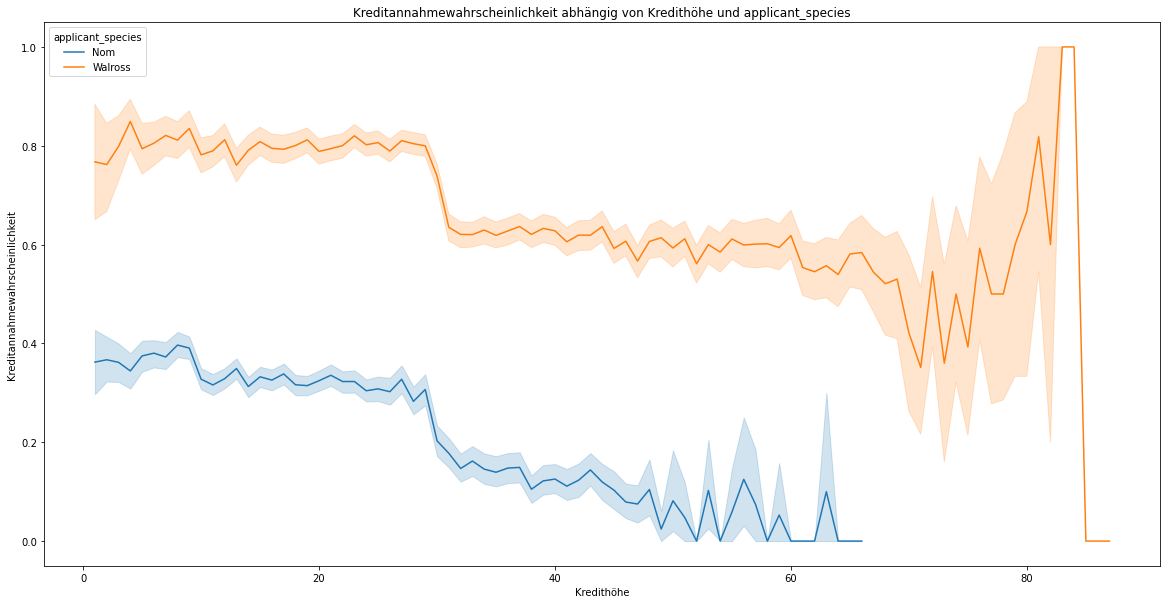

In [9]:
create_linechart("applicant_species")

Dieser Plot bestärkt die These des ersten Violinplots. Die Wahrscheinlichkeit, dass der Kreditantrag eines Noms angenommen wird, ist nur ca. die Hälfte (oft sogar weniger) der Wahrscheinlichkeit eines Walrosses. Außerdem sinkt die Kreditannahmewahrscheinlichkeit für Noms stetig, während die der Walrosse sich fast konstant hält und für besonders hohe Kredite sogar steigt.

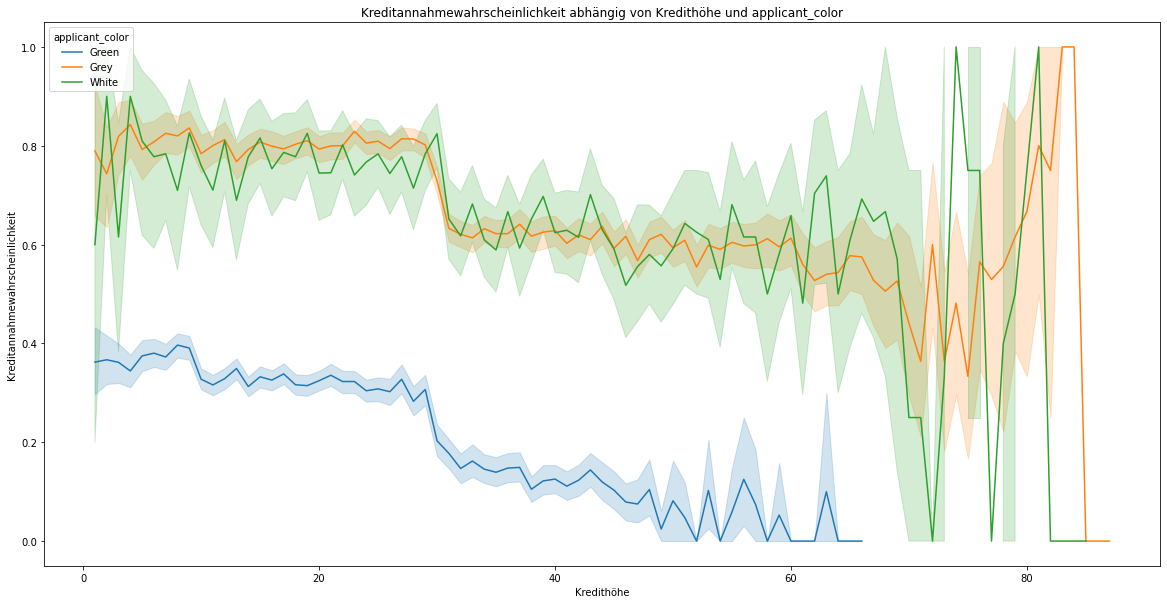

In [10]:
create_linechart("applicant_color")

Der Plot über die Farbe liefert ein ähnliches Bild wie der Plot über die Spezies des Antragstellers. Dies ist dem Fakt geschuldet, dass jeder Nom grün (blaue Linie) ist. Grau (orangene Linie) und Weiß (grüne Linie) bewegen sich auf ähnlichen Linien, wobei die Schwankungen bei weißen Walrossen deutlich größer sind.

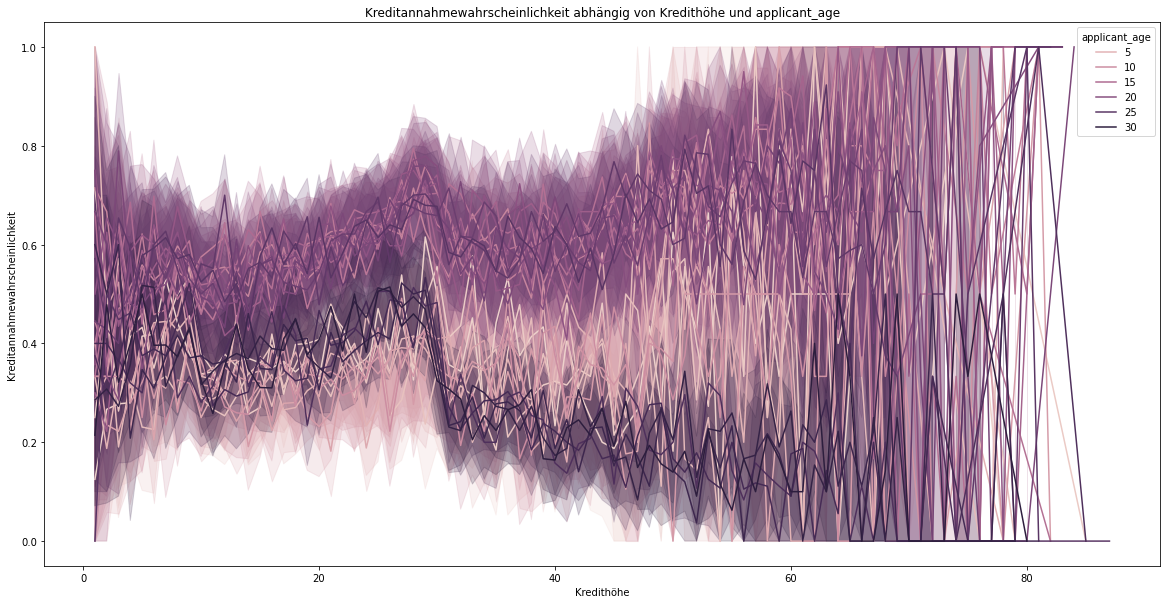

In [11]:
create_linechart("applicant_age")

Dieser Plot zeigt, dass ganz junge und ganz alte Antragsteller (5 und 30) eine geringe Kreditannahmewahrscheinlichkeit haben als Antragssteller des mittleren Alters.

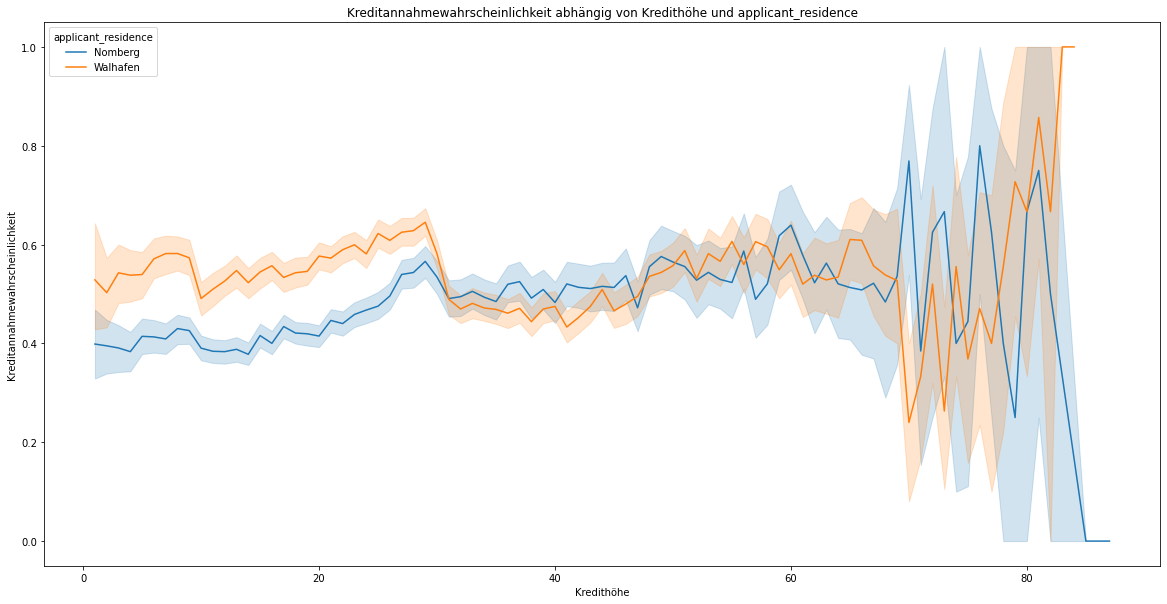

In [12]:
create_linechart("applicant_residence")

Ähnlich zu dem Plot über den Ort des Shops beeinflusst auch der Wohnort des Antragsstellers die Wahrscheinlichkeit nur bedingt.

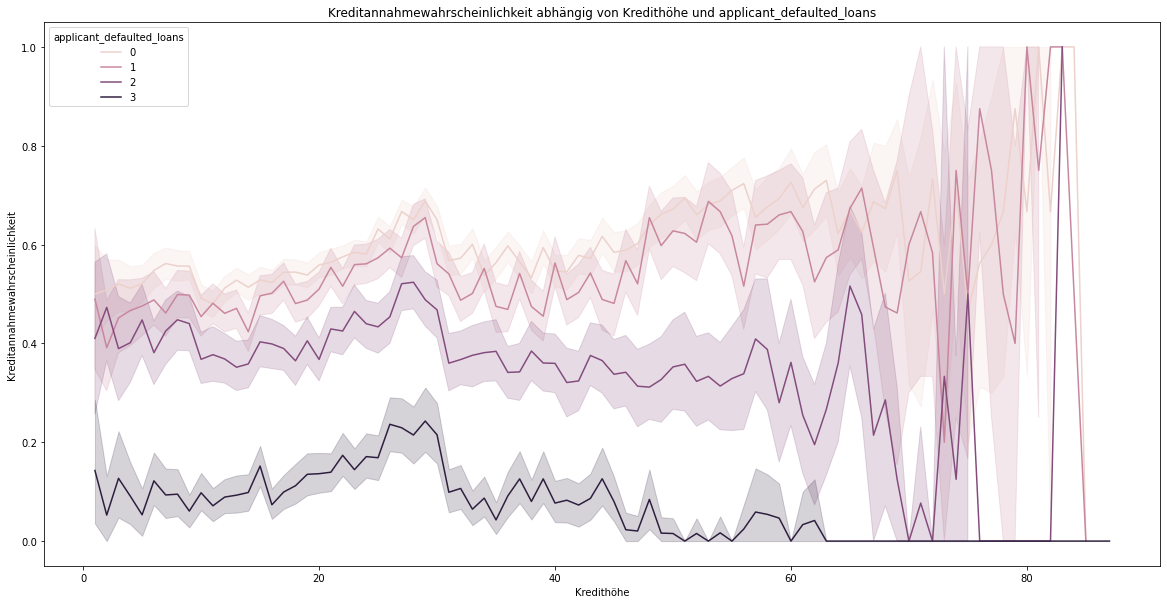

In [13]:
create_linechart("applicant_defaulted_loans")

Erwarteterweise zeigt der Plot, dass Kreditanträge von Antragstellernb, die insolvente Kredite besitzen, mit einer geringen Wahrscheinlichkeit angenommen werden. Je mehr Kredite von dem Antragssteller nicht zurückgezahlt wurde, desto größer ist die Wahrscheinlichkeit, dass der neue Kredit auch abgelehnt wird.

Es muss noch untersucht werden, ob die Antragsteller mit vielen insolventen Krediten überwiegend Noms sind. Falls dies nicht der Fall ist, liegt hier ein deutliches Bias zur Bevorzugung von Walrossen vor.

# Belegung der Thesen durch Kreisdiagramme und Histogramme

### Anzahl der bewilligten Kredite pro Restaurant und Spezies

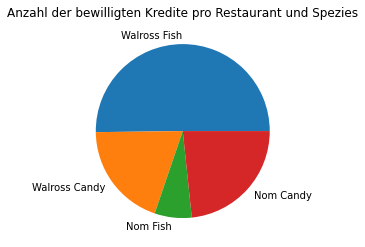

In [14]:
# Anzahl der bewilligten Kredite Restaurants pro Spezies

walross_granted_credits = creditsGranted[creditsGranted["applicant_species"] == "Walross"]
nom_granted_credits = creditsGranted[creditsGranted["applicant_species"] == "Nom"]

# walross purpose
walross_granted_fish = walross_granted_credits[walross_granted_credits["purpose"] == "FishRestaurant"].shape[0]
walross_granted_fcandystore = walross_granted_credits[walross_granted_credits["purpose"] == "Candystore"].shape[0]

# nom purpose
nom_granted_fish = nom_granted_credits[nom_granted_credits["purpose"] == "FishRestaurant"].shape[0]
nom_granted_fcandystore = nom_granted_credits[nom_granted_credits["purpose"] == "Candystore"].shape[0]

plt.figure()
plt.pie([walross_granted_fish, walross_granted_fcandystore, nom_granted_fish, nom_granted_fcandystore], labels=["Walross Fish", "Walross Candy", "Nom Fish", "Nom Candy"])
plt.title("Anzahl der bewilligten Kredite pro Restaurant und Spezies")
plt.show()

Fast 3/4 der angenommenen Kredite wurden an Walrosse ausgezahlt. Dies bestätigt die Thesen und Tendenzen aus den vorherigen Plots. Allerdings muss noch überprüft werden, wie viele Kredite von der jeweiligen Spezies abgelehnt wurden.

### Anzahl der nicht bewilligten Kredite pro Restaurant und Spezies

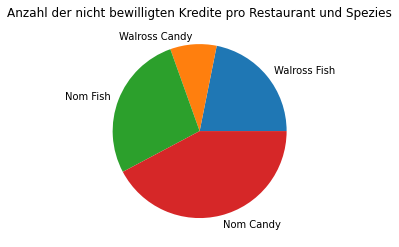

In [15]:
# Anzahl der nicht bewilligten Kredite Restaurants pro Spezies
creditsNotGranted = loans[loans['granted'] == False]

walross_not_granted_credits = creditsNotGranted[creditsNotGranted["applicant_species"] == "Walross"]
nom_not_granted_credits = creditsNotGranted[creditsNotGranted["applicant_species"] == "Nom"]

# walross purpose
walross_not_granted_fish = walross_not_granted_credits[walross_not_granted_credits["purpose"] == "FishRestaurant"].shape[0]
walross_not_granted_fcandystore = walross_not_granted_credits[walross_not_granted_credits["purpose"] == "Candystore"].shape[0]

# nom purpose
nom_not_granted_fish = nom_not_granted_credits[nom_not_granted_credits["purpose"] == "FishRestaurant"].shape[0]
nom_not_granted_fcandystore = nom_not_granted_credits[nom_not_granted_credits["purpose"] == "Candystore"].shape[0]

plt.figure()
plt.pie([walross_not_granted_fish, walross_not_granted_fcandystore, nom_not_granted_fish, nom_not_granted_fcandystore], labels=["Walross Fish", "Walross Candy", "Nom Fish", "Nom Candy"])
plt.title("Anzahl der nicht bewilligten Kredite pro Restaurant und Spezies")
plt.show()

Hier bildet sich das inverse Bild zu dem obigen Kreisdiagramm: Fast 3/4 aller abgelehnten Kreditanfragen wurden von Noms gestellt.

### Insgesamt gestellte Kreditanfragen nach Spezies vs. Bewilligte Kreditanfragen nach Spezies

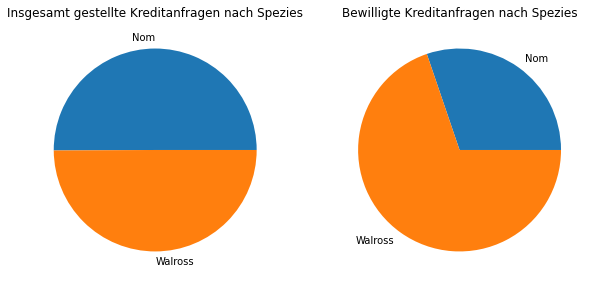

In [16]:
requested_loans_nom = loans[loans['applicant_species'] == 'Nom'].shape[0]
requested_loans_wallross = loans[loans['applicant_species'] == 'Walross'].shape[0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.pie([requested_loans_nom,requested_loans_wallross], labels=["Nom", "Walross"])
ax1.set_title("Insgesamt gestellte Kreditanfragen nach Spezies")

requested_loans_nom = creditsGranted[creditsGranted['applicant_species'] == 'Nom'].shape[0]
requested_loans_wallross = creditsGranted[creditsGranted['applicant_species'] == 'Walross'].shape[0]
ax2.pie([requested_loans_nom,requested_loans_wallross], labels=["Nom", "Walross"])
ax2.set_title("Bewilligte Kreditanfragen nach Spezies")
plt.show()

Es wurden annähernd gleich viele Anfragen von Walrössern und Noms gestellt. Jedoch sind zwei drittel der bewilligten Kredite von Walrossen und nur ein drittel von Noms. Dies könnte z.B. damit zusammenhängen, dass die Noms ihre KRedite nicht zurückbezahlen.

### Nicht zurückgezahlte Löhne nach Spezies

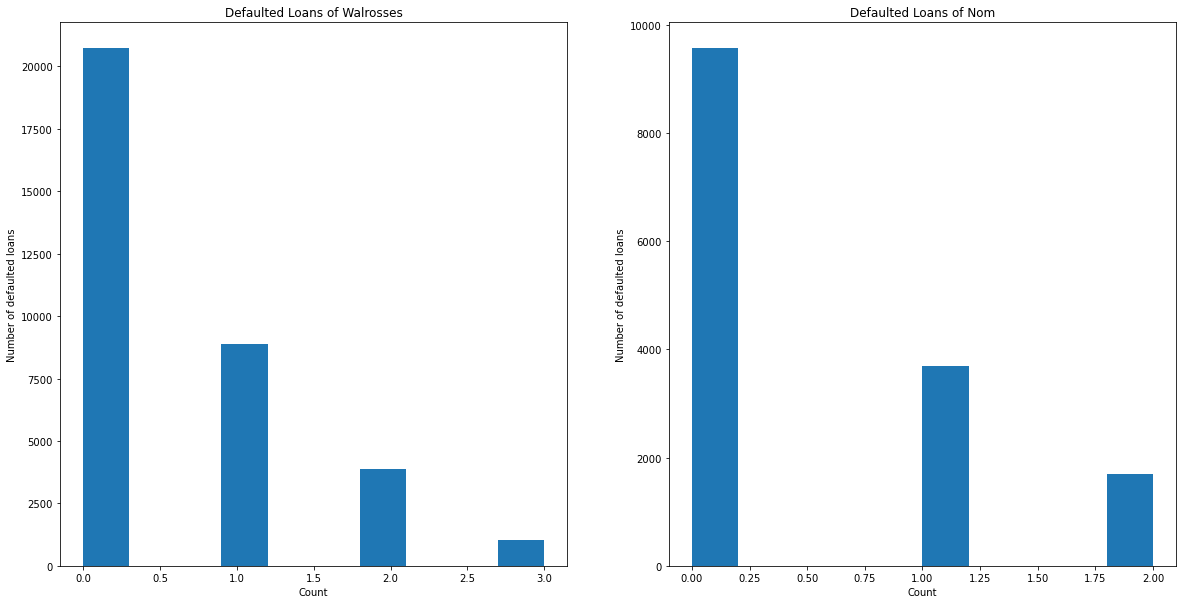

In [17]:
requested_loans_wallross = creditsGranted[creditsGranted['applicant_species'] == 'Walross']
requested_loans_noms = creditsGranted[creditsGranted['applicant_species'] == 'Nom']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.hist(requested_loans_wallross["applicant_defaulted_loans"])
ax1.set_title("Defaulted Loans of Walrosses")
ax1.set_xlabel("Count")
ax1.set_ylabel("Number of defaulted loans")
ax2.hist(requested_loans_noms["applicant_defaulted_loans"])
ax2.set_title("Defaulted Loans of Nom")
ax2.set_xlabel("Count")
ax2.set_ylabel("Number of defaulted loans")

plt.show()

# Fazit

Nach den obigen Charts lässt sich definitv sagen, dass hier ein Bias zu Gunsten von Walrossen vorliegt. Noms werden hier benachteiligt.

Insgesamt haben beide Spezies gleich viele Kredite beantragt. Der durchschnittliche Kreditbetrag bei Noms liegt deutlich unter dem der Walrosse. Trotzdem werden Kreditanträge von Noms eher abgelehnt, obwohl Walrosse die Kredite eher nicht zurückzahlen im Vergleich zu Noms.

# Ausgleich des Biases

Es gibt offensichtlich einen Bias, da Walrösser ca. zwei drittel der Kredite bewilligt bekommen, obwohl sie ihre Kredite öfters nicht zurückzahlen als die Noms. Dies könnte ausgeglichen werden, indem für ein ML Verfahren Datensätze bei denen ein Nom der Kredit gewährt wird, öfters gesamplet werde. Dies soll das Ergebnis haben, dass Walrossen und Noms gleich häufig die Kredite gewährt werden.